# Esame spettri Raman
Lo scopo di questo progetto è duplice. Per ogni campione

1. Fare una clusterizzazione degli spettri e verificare se questa correla con la posizione geometrica dei punti di rilievo
2. Costruire un classificatore per il tipo di materiale

Per il punto 2, verranno forniti dei label per ogni spettro più avanti. In prima istanza, si può procedere assegnando i label agli spettri sulla base della somiglianza con gli spettri di campioni puri contenuti nella cartella `Database Raman`.

È richiesta inoltre una EDA degli spettri. Considerare:
1. range in cui si trovano i picchi
2. numero di picchi (se riuscite a misurarlo in modo automatico, e.g. basandosi sulle derivate, facoltativo)
3. intensità (integrale) degli spettri
4. ...


## Dati forniti
Vengono forniti, inizialmente, i seguenti dati (altri sono disponibili su richiesta).

* Due campioni con e senza background noise rimosso
* Una cartella `Database Raman` con gli spettri di riferimento (senza background) per diversi materiali puri.

I file contenuti nella cartella `Database Raman` sono nominati a seconda del materiale e contengono ciascuno due colonne. La prima è il numero d'onda (unità 1/cm), cioè l'inverso della lunghezza d'onda. La seconda contiene l'intensità dello scattering raman misurato a quel numero d'onda.

I file campione contengono gli spettri raccolti lungo una griglia di 11 righe x 11 colonne. Ogni punto dista dagli altri un micron. Ognuno di questi file contiene 122 colonne. La prima raccoglie i numeri d'onda, sempre in unità 1/cm, le restanti 121 gli spettri, ordinati come segue: le prime 11 colonne corrispondono alla prima riga di punti sul campione, le seconde 11 alla riga sottostante, e così via. 

Sono forniti due campioni, denominati `S1` e `S2`. Per ognuno di questi sono forniti due files: `_mapA` e `_bkg_mapA`. Nel secondo è stato rimosso il rumore di fondo (background), permettendo di confrontare più facilmente lo spettro con gli spettri di riferimento nella cartella `Database Raman`. 

Gli spettri **non sono normalizzati**. L'integrale delle curve corrisponde sperimentalmente all'esposizione e quindi al tempo di raccolta del segnale. Gli spettri a background rimosso e quelli nella cartella `Database Raman` si possono normalizzare al fine di compararli. 

Le finestre di acquisizione per gli spettri di riferimento e quelli raccolti sono diverse, ma le unità sono simili.

Il file `RRUF_list.txt` contiene una lista di spettri.

### Suggerimenti
Per provare a dare un label ai vari spettri, definite una distanza tra due spettri.

Potrebbe essere necessario fare una piccola interpolazione per paragonare gli spettri di riferimento a quelli misurati. 

## Esempio di lettura files

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as pltd
%config Completer.use_jedi = False

In [4]:
names = ['wl']+[f'l{k}s{i}' for k in range(1,12) for i in range(1,12)]

Carico i file con e senza background per confrontarli. Bisogna passare le colonne con i nomi corretti (i nomi sono solo un suggerimento) altrimenti `pd.read_csv` identifica la prima riga come header.

In [5]:
data_S1 = pd.read_csv('S1_mapA_11x11.txt', delim_whitespace=True, names=names)
data_S1bkg = pd.read_csv('S1_bkg_mapA_11x11.txt', delim_whitespace=True, names=names)

FileNotFoundError: [Errno 2] No such file or directory: 'S1_mapA_11x11.txt'

Qui sotto sono riportati alcuni spettri, con il background, per far vedere come si comportano. 

In [ ]:
data_S1.l1s1.plot()
data_S1.l1s2.plot()
data_S1.l1s3.plot()
data_S1.l1s4.plot()
data_S1.l1s5.plot()

Gli stessi spettri a background rimosso.

<AxesSubplot:>

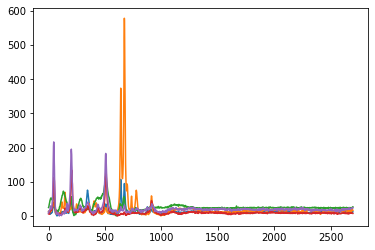

In [9]:
data_S1bkg.l1s1.plot()
data_S1bkg.l1s2.plot()
data_S1bkg.l1s3.plot()
data_S1bkg.l1s4.plot()
data_S1bkg.l1s5.plot()

Uno spettro tipico del Database di riferimento. Notare come sia meno rumoroso, nonché la scala in x.

In [10]:
albite = np.loadtxt('./Database Raman/albite.txt')

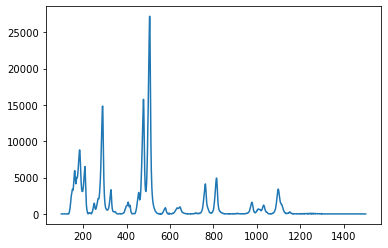

In [12]:
plt.plot(albite[:,0],albite[:,1])

Usando l'integrazione numerica, notiamo come le curve non siano normalizzate.

In [70]:
np.trapz(data_S1bkg.l1s2, x=data_S1bkg.wl)

57000.08301868

In [71]:
np.trapz(albite[:,1], x=albite[:,0])

1620569.6773449506